<a href="https://colab.research.google.com/github/haythemtellili/Great-notebook/blob/master/Time_series_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [4]:
df = pd.read_csv('/content/AirPassengers.csv')
df.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [0]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")

In [6]:
df.shape

(144, 1)

In [0]:
train, test = df[:-12], df[-12:]

In [0]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [0]:
n_input = 12
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [10]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [11]:
model.fit_generator(generator,epochs=90)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/90





20/20 [==============================] - 10s 476ms/step - loss: 0.0793
Epoch 2/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0204
Epoch 3/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0178
Epoch 4/90
20/20 [==============================] - 1s 29ms/step - loss: 0.0106
Epoch 5/90
20/20 [==============================] - 1s 27ms/step - loss: 0.0124
Epoch 6/90
20/20 [==============================] - 1s 29ms/step - loss: 0.0104
Epoch 7/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0099
Epoch 8/90
20/20 [==============================] - 1s 29ms/step - loss: 0.0099
Epoch 9/90
20/20 [==============================] - 1s 29ms/step - loss: 0.0094
Epoch 10/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0097
Epoch 11/90
20/20 [==============================] - 1s 28ms/step - loss: 0.0086
Epoch 12/90
20

In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                          index=df[-n_input:].index, columns=['Prediction'])
data = pd.concat([df,df_predict], axis=1)

No handles with labels found to put in legend.


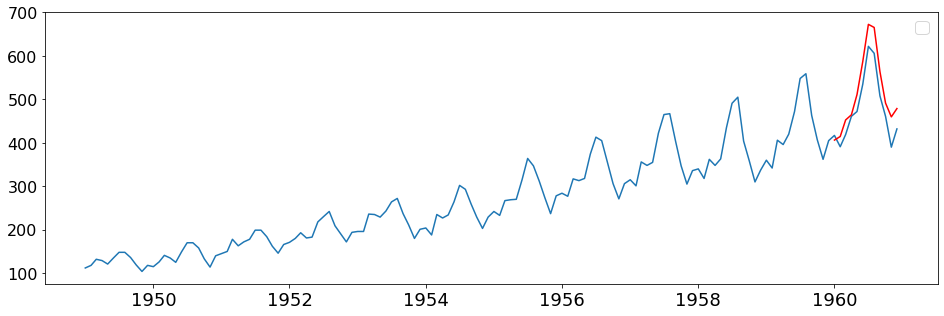

In [29]:
plt.figure(figsize=(16, 5))
plt.plot(data.index, data['AirPassengers'])
plt.plot(data.index, data['Prediction'], color='r')
plt.legend(loc='best', fontsize='xx-large')
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.show()

# Stock price prediction

In [1]:
!unzip "/content/drive/My Drive/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master.zip"

Archive:  /content/drive/My Drive/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master.zip
6918aaafb1b11e5087b8424e1a50f4028268a4ea
   creating: Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/
  inflating: Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Google_Stock_Price_Test.csv  
  inflating: Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Google_Stock_Price_Train.csv  
  inflating: Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/README.md  
  inflating: Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/rnn.py  


In [31]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
data=pd.read_csv('/content/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Google_Stock_Price_Train.csv')
test=pd.read_csv('/content/Stock-Price-Prediction-using-Keras-and-Recurrent-Neural-Networ-master/Google_Stock_Price_Test.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [0]:
train=data[['Date','Open']]
test=test[['Date','Open']]

In [19]:
train['Date'] = pd.to_datetime(train['Date'])
train = train.set_index("Date")
train.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open
Date,
2012-01-03,325.25
2012-01-04,331.27
2012-01-05,329.83
2012-01-06,328.34
2012-01-09,322.04


In [20]:
test['Date'] = pd.to_datetime(test['Date'])
test = test.set_index("Date")
test.head()

,Open
Date,
2017-01-03,778.81
2017-01-04,788.36
2017-01-05,786.08
2017-01-06,795.26
2017-01-09,806.40


In [22]:
train.shape,test.shape

((1258, 1), (20, 1))

In [0]:
scaler = MinMaxScaler()
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

In [0]:
n_input = 20
n_features = 1
generator = TimeseriesGenerator(train, train, length=n_input, batch_size=6)

In [25]:
model = Sequential()
model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
model.add(Dropout(0.15))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit_generator(generator,epochs=10)

Epoch 1/10
207/207 [==============================] - 12s 57ms/step - loss: 0.0223
Epoch 2/10
207/207 [==============================] - 11s 53ms/step - loss: 0.0030
Epoch 3/10
207/207 [==============================] - 11s 53ms/step - loss: 0.0026
Epoch 4/10
207/207 [==============================] - 11s 53ms/step - loss: 0.0032
Epoch 5/10
207/207 [==============================] - 11s 54ms/step - loss: 0.0025
Epoch 6/10
207/207 [==============================] - 11s 53ms/step - loss: 0.0024
Epoch 7/10
207/207 [==============================] - 11s 54ms/step - loss: 0.0022
Epoch 8/10
207/207 [==============================] - 11s 53ms/step - loss: 0.0019
Epoch 9/10
207/207 [==============================] - 11s 53ms/step - loss: 0.0019
Epoch 10/10
207/207 [==============================] - 11s 53ms/step - loss: 0.0022


In [0]:
pred_list = []

batch = train[-n_input:].reshape((1, n_input, n_features))

for i in range(n_input):   
    pred_list.append(model.predict(batch)[0]) 
    batch = np.append(batch[:,1:,:],[[pred_list[i]]],axis=1)

In [0]:
df_predict = pd.DataFrame(scaler.inverse_transform(pred_list),
                           columns=['Prediction'])

In [29]:
df_predict.head(30)

,Prediction
0,766.019155
1,760.930616
2,755.754188
3,750.500734
4,745.221391
5,739.964348
6,734.765620
7,729.638599
8,724.598410
9,719.644668
